# Outliers

In [ ]:
import numpy as np 
arr = np.array([2,3,4,6,7,8,9,12,13,16,17,23,25,27,34,37,201])
arr

array([  2,   3,   4,   6,   7,   8,   9,  12,  13,  16,  17,  23,  25,
        27,  34,  37, 201])

In [ ]:
Q1 = np.percentile(arr,25)    # 25 means Q1
Q3 = np.percentile(arr,75)    # 75 means Q3

In [ ]:
IQR = Q3 - Q1
IQR

np.float64(18.0)

In [ ]:
# find upper fence and lower fence to find outliers.
UF = Q3 + (1.5*IQR)
LF = Q1 - (1.5*IQR)

In [ ]:
l = []
for i in arr:
    if i >= LF and i <= UF:
        l.append(i)
arr2 = np.array(l)

In [ ]:

print(arr)
print(arr2)

[  2   3   4   6   7   8   9  12  13  16  17  23  25  27  34  37 201]
[ 2  3  4  6  7  8  9 12 13 16 17 23 25 27 34 37]


<Axes: >

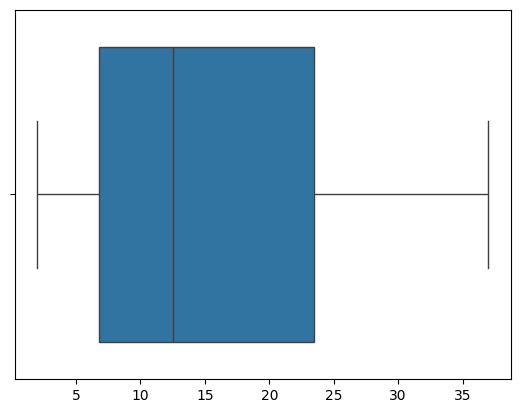

In [ ]:
import seaborn as sns 

sns.boxplot(x = arr2)

# Z-Test

In [ ]:
import numpy as np 
from scipy.stats import norm 

In [ ]:
sample = [172, 174, 168, 169, 171, 173, 175, 170, 169, 172]
population_mean = 170
population_std = 3
samp_mean = np.mean(sample)
n = len(sample)


In [ ]:
z_score = (samp_mean - population_mean) / (population_std / np.sqrt(n))
z_score

np.float64(1.3703203194063098)

In [ ]:
p_value = 2 * (1 - norm.cdf(abs(z_score)))

In [ ]:
p_value

np.float64(0.17058693287143756)

In [ ]:

alpha = 0.05

if p_value < alpha:
    print("I will reject the null hypothesis")
else:
    print("i will accept the null hypothesis ")

i will accept the null hypothesis 


# T-Test

In [ ]:
import numpy as np 
from scipy import stats

In [ ]:

sample = [172, 174, 168, 169, 171, 173, 175, 170, 169, 172]
sample_mean = np.mean(sample)
sample_std = np.std(sample,ddof = 1)
n = len(sample)
mean_population = 170

In [ ]:
t_stats = (sample_mean - mean_population) / (sample_std / np.sqrt(n))
t_stats

np.float64(1.7782469350914734)

In [ ]:
p_value = 2 * (1 - stats.t.cdf(abs(t_stats),df = n -1 ))
alpha = 0.05

In [ ]:
if p_value < alpha:
    print("reject the null hypothesis")
else:
    print("accept the null hypothesis")

accept the null hypothesis


# Two sample T-Test

In [ ]:
import numpy as np 
from scipy import stats 

In [ ]:
group_A = [85, 88, 90, 92, 87, 85, 89, 91, 86, 88] 
group_B = [82, 84, 80, 83, 81, 79, 78, 85, 84, 83] 

In [ ]:
t_stats , p_value = stats.ttest_ind(group_A, group_B , equal_var= False)

In [ ]:

t_stats

np.float64(5.829604009507161)

In [ ]:
alpha = 0.05

In [ ]:
if p_value < alpha:
    print("I will reject the null hypothesis ")
else:
    print("i will accept the null hypothesis" )

I will reject the null hypothesis 


# Chi-Square Test

In [ ]:
import numpy as np 
import seaborn as sns 
from scipy.stats import chi2_contingency
import pandas as pd 

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
contingency_table = pd.crosstab(df['sex'],df['survived'])


In [ ]:
contingency_table

survived,0,1
sex,,
female,81,233
male,468,109


In [ ]:
chi2, p_value , dof , expected = chi2_contingency(contingency_table)

In [ ]:

expected

array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]])

In [ ]:
chi2

np.float64(260.71702016732104)

In [ ]:

alpha = 0.05

In [ ]:
if p_value < alpha:
    print("we reject the null hypothesis and there is a significant relationship between gender and survivl")
else:
    print("there is no connenction")

we reject the null hypothesis and there is a significant relationship between gender and survivl


# Annova Test

In [ ]:
import seaborn as sns
import pandas as pd 
from scipy.stats import f_oneway

In [ ]:

df = sns.load_dataset('titanic')

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:

df = df[['age','pclass']].dropna()

In [ ]:
df['pclass'].unique()

array([3, 1, 2])

In [ ]:
class_1 = df[df['pclass'] == 1]['age']
class_2 = df[df['pclass'] == 2]['age']
class_3 = df[df['pclass'] == 3]['age']
class_1

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: age, Length: 186, dtype: float64

In [ ]:
f_stats, p_value = f_oneway(class_1,class_2,class_3)

In [ ]:
f_stats

np.float64(57.44348434067624)

In [ ]:

p_value

np.float64(7.487984171959212e-24)

In [ ]:

alpha = 0.05

In [ ]:
if p_value < alpha:
    print("reject the null hypothesis and there is a signafacant difference in atleat one passenger class")

else:
    print("there is no significant difference ")

reject the null hypothesis and there is a signafacant difference in atleat one passenger class
